In [3]:
from IPython.display import Image

- 密度估计，就是概率密度估计，pde（probability density estimation）
    - 密度，通俗地理解，就是概率值的高低，概率值越高，如果采样的话，点数就越密集；
    - 反之，概率密度越低的地方，数据点在该区域出现的频率越低，采样点也会更稀疏。

## cdf samping

In [5]:
Image(url='../../imgs/cdf_sampling.png', width=600)

- 从 0-1 均匀分布中进行采样 $z\sim U[0,1]$
    - 因为 cdf 的取值就在 0-1 之间（类 sigmoid 函数）
- 需要知道 $F^{-1}_X(z)$，采样得到的 $z$ 代入这个逆函数，相当于从原函数中进行采样 $f_X(\mathbf x)$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成均匀分布的随机数
num_samples = 1000
uniform_samples = np.random.uniform(0, 1, num_samples)

In [9]:
# 计算正态分布的反函数（即其分位数函数）
normal_samples = norm.ppf(uniform_samples)
np.mean(normal_samples), np.std(normal_samples)

(-0.009352626854154267, 1.007274631856921)

(-4.0, 4.0)

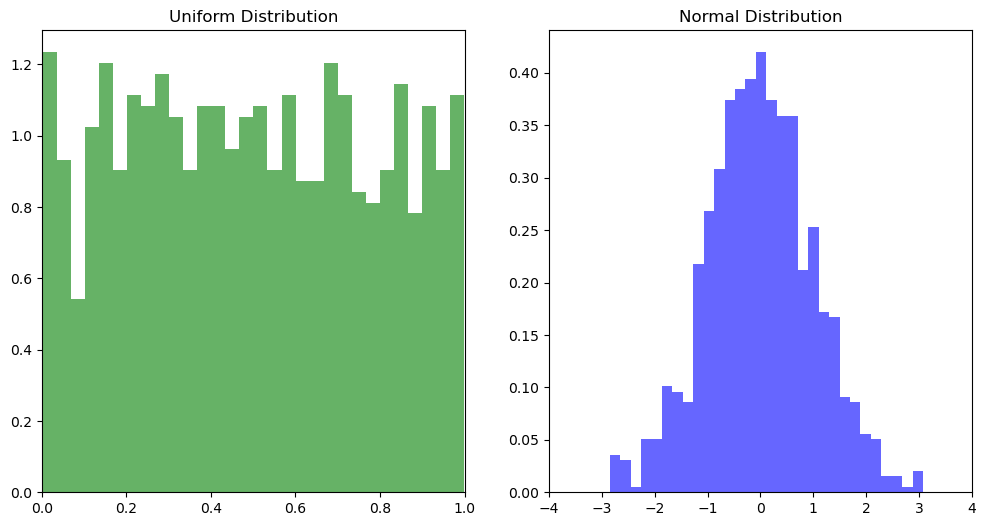

In [7]:
# 可视化均匀分布和转换后的正态分布
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 均匀分布的直方图
axs[0].hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlim(0, 1)

# 正态分布的直方图
axs[1].hist(normal_samples, bins=30, density=True, alpha=0.6, color='b')
axs[1].set_title('Normal Distribution')
axs[1].set_xlim(-4, 4)

In [11]:
# 计算正态分布的反函数（即其分位数函数）
normal_samples = norm.ppf(uniform_samples, loc=1, scale=2)
np.mean(normal_samples), np.std(normal_samples)

(0.9812947462916914, 2.014549263713842)

(-6.0, 6.0)

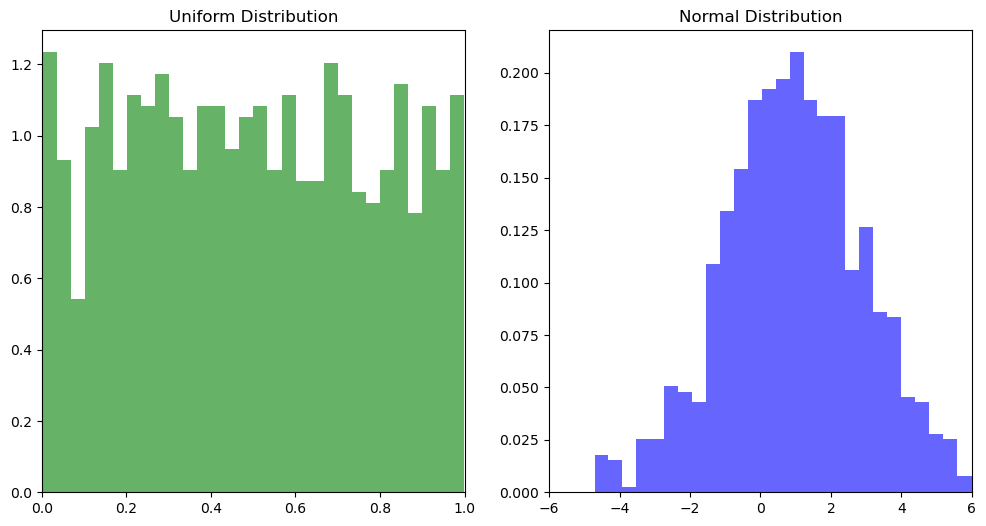

In [13]:
# 可视化均匀分布和转换后的正态分布
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 均匀分布的直方图
axs[0].hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlim(0, 1)

# 正态分布的直方图
axs[1].hist(normal_samples, bins=30, density=True, alpha=0.6, color='b')
axs[1].set_title('Normal Distribution')
axs[1].set_xlim(-6, 6)

## histogram density estimator vs. KDE (kernel density estimator)

$$
\begin{split}
&\hat{p}_{\text{kde}}(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h^d} K \left( \frac{\|\mathbf{x} - \mathbf{x}^i\|}{h} \right)\\
&K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
\end{split}
$$

- $h$: bandwidth, $d$: dimension
- 核密度估计（KDE）是一种常用的概率密度估计方法。它通过核函数（如高斯核）对每个数据点进行平滑处理，从而生成连续的概率密度函数。
    - 计算 $\hat p(x)$ 时（任给一个 $x$，算其 pdf），所有的观测数据点都要对其计算平滑；

In [14]:
from scipy.stats import gaussian_kde

In [16]:
# 生成随机样本数据
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# 直方图密度估计
hist_density, bins = np.histogram(data, bins=30, density=True)
bin_centers = (bins[1:] + bins[:-1]) * 0.5

(array([0.00422893, 0.        , 0.01268678, 0.01268678, 0.02537356,
        0.05497605, 0.0803496 , 0.15647028, 0.16915706, 0.23259096,
        0.31716949, 0.4144348 , 0.32139842, 0.3975191 , 0.43135051,
        0.36368768, 0.35522983, 0.23681989, 0.19030169, 0.13109672,
        0.11840994, 0.09726531, 0.05074712, 0.01268678, 0.02960249,
        0.00422893, 0.00422893, 0.        , 0.        , 0.00422893]),
 array([-3.24126734, -3.00480071, -2.76833408, -2.53186746, -2.29540083,
        -2.0589342 , -1.82246757, -1.58600095, -1.34953432, -1.11306769,
        -0.87660106, -0.64013444, -0.40366781, -0.16720118,  0.06926545,
         0.30573208,  0.5421987 ,  0.77866533,  1.01513196,  1.25159859,
         1.48806521,  1.72453184,  1.96099847,  2.1974651 ,  2.43393172,
         2.67039835,  2.90686498,  3.14333161,  3.37979824,  3.61626486,
         3.85273149]),
 <BarContainer object of 30 artists>)

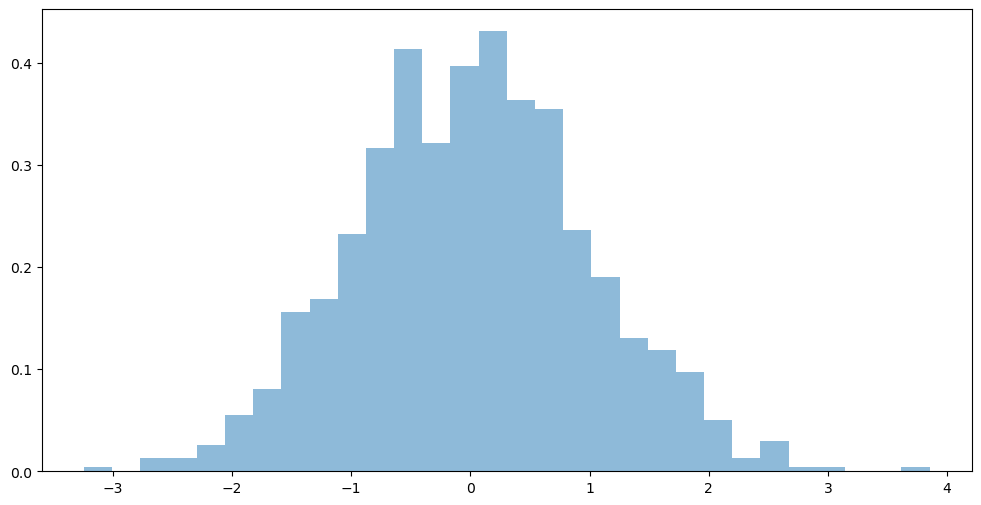

In [17]:
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram Density')

In [25]:
# x^i
kde = gaussian_kde(data, bw_method=0.3)

In [22]:
callable(kde)

True

In [27]:
kde(0)

array([0.38946459])

In [24]:
# x
x = np.linspace(-4, 4, 1000)
density_estimate = kde(x)

In [30]:
def my_kde(data, x, h=0.3, d=1):
    def K(u):
        return 1/np.sqrt(2*np.pi) * np.exp(-0.5*u**2)
    return np.mean(1/(h**d)*K(np.abs(data - x)/h))

In [33]:
my_kde(data, 0)

0.38889135648902423

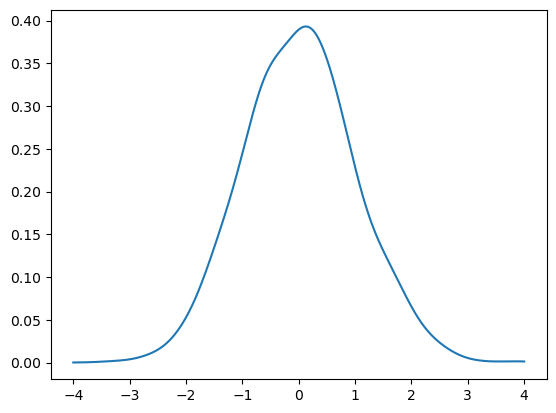

In [26]:
plt.plot(x, density_estimate, '-', label='Kernel Density Estimator')

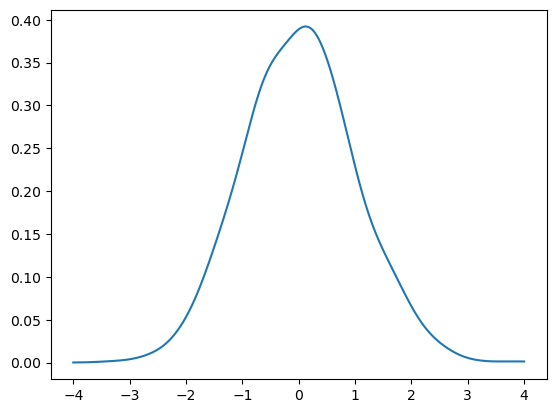

In [36]:
plt.plot(x, [my_kde(data, t) for t in x ], '-', label='Kernel Density Estimator')